In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#Load dataset 
train = pd.read_csv('/Users/jinyaotian/Desktop/Aunalytics/train_clean.csv')
#test = pd.read_csv('/Users/jinyaotian/Desktop/Aunalytics/test_clean.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30139 entries, 0 to 30138
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30139 non-null  int64 
 1   index           30139 non-null  int64 
 2   age             30139 non-null  int64 
 3   workclass       30139 non-null  object
 4   fnlwgt          30139 non-null  int64 
 5   education       30139 non-null  object
 6   education-num   30139 non-null  int64 
 7   marital-status  30139 non-null  object
 8   occupation      30139 non-null  object
 9   relationship    30139 non-null  object
 10  race            30139 non-null  object
 11  sex             30139 non-null  object
 12  capital-gain    30139 non-null  int64 
 13  capital-loss    30139 non-null  int64 
 14  hours-per-week  30139 non-null  int64 
 15  native-country  30139 non-null  object
 16  class           30139 non-null  int64 
 17  continent       30139 non-null  object
dtypes: int

Note: 

class = 0: '<= 50K'

class = 1: '> 50K'

In [7]:
# Continuous variables
Con_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']
Dis_vars = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'continent', 'class']

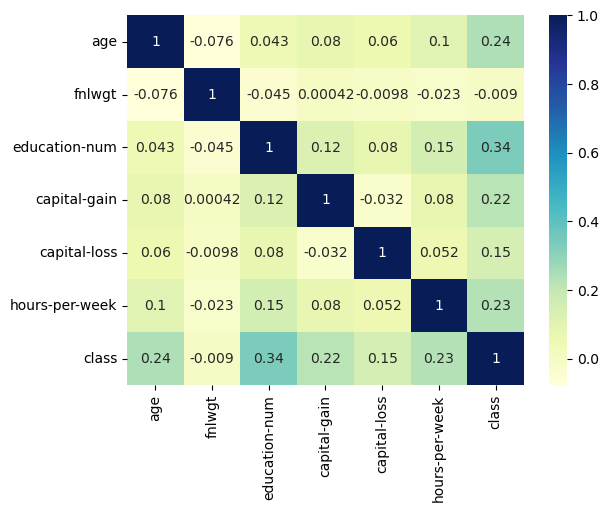

In [10]:
#Correlation heatmap
data = train[Con_vars]
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

1. There is barely correlation among those continuous variables.

2. There are week correlation between continuous variables and the target 'class'. 


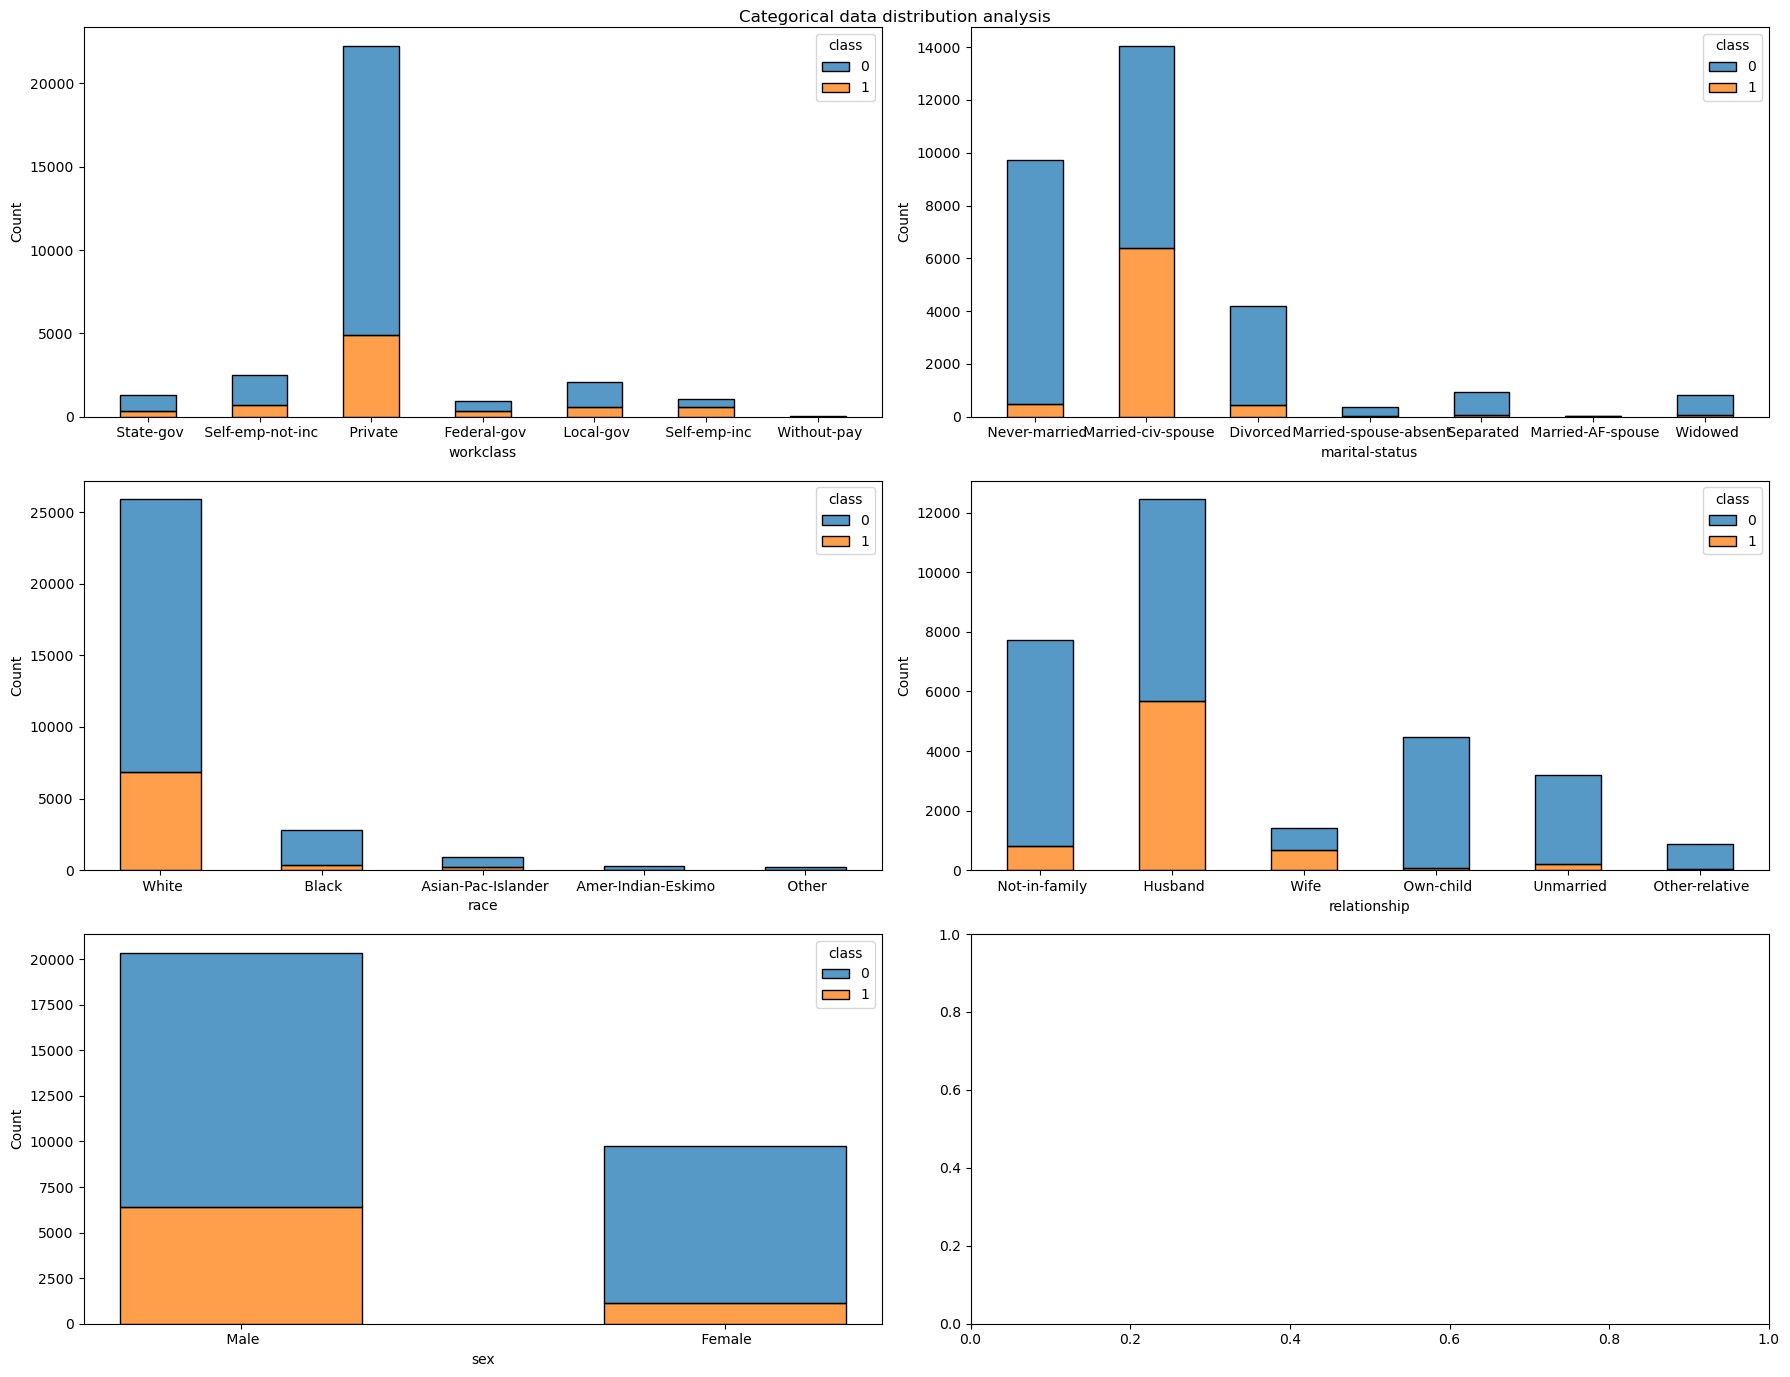

In [20]:
#Categorical data distribution analysis
fig, axes  = plt.subplots(3,2, figsize = (18,14))
fig.suptitle('Categorical data distribution analysis')

#workclass
sns.histplot(ax = axes[0,0], data= train, x = 'workclass', hue= 'class', stat = 'count', multiple= 'stack', shrink= .5)
#marital-status
sns.histplot(ax = axes[0,1], data= train, x = 'marital-status',hue= 'class', stat = 'count', multiple= 'stack', shrink= .5)
#Race 
sns.histplot(ax = axes[1,0], data= train, x = 'race', hue= 'class', stat = 'count', multiple= 'stack', shrink= .5)
#Relationship
sns.histplot(ax = axes[1,1], data= train, x = 'relationship',hue= 'class', stat = 'count', multiple= 'stack', shrink= .5)
#Sex
sns.histplot(ax = axes[2,0], data= train, x = 'sex', hue= 'class', stat = 'count', multiple= 'stack', shrink= .5)
plt.tight_layout()
plt.show()

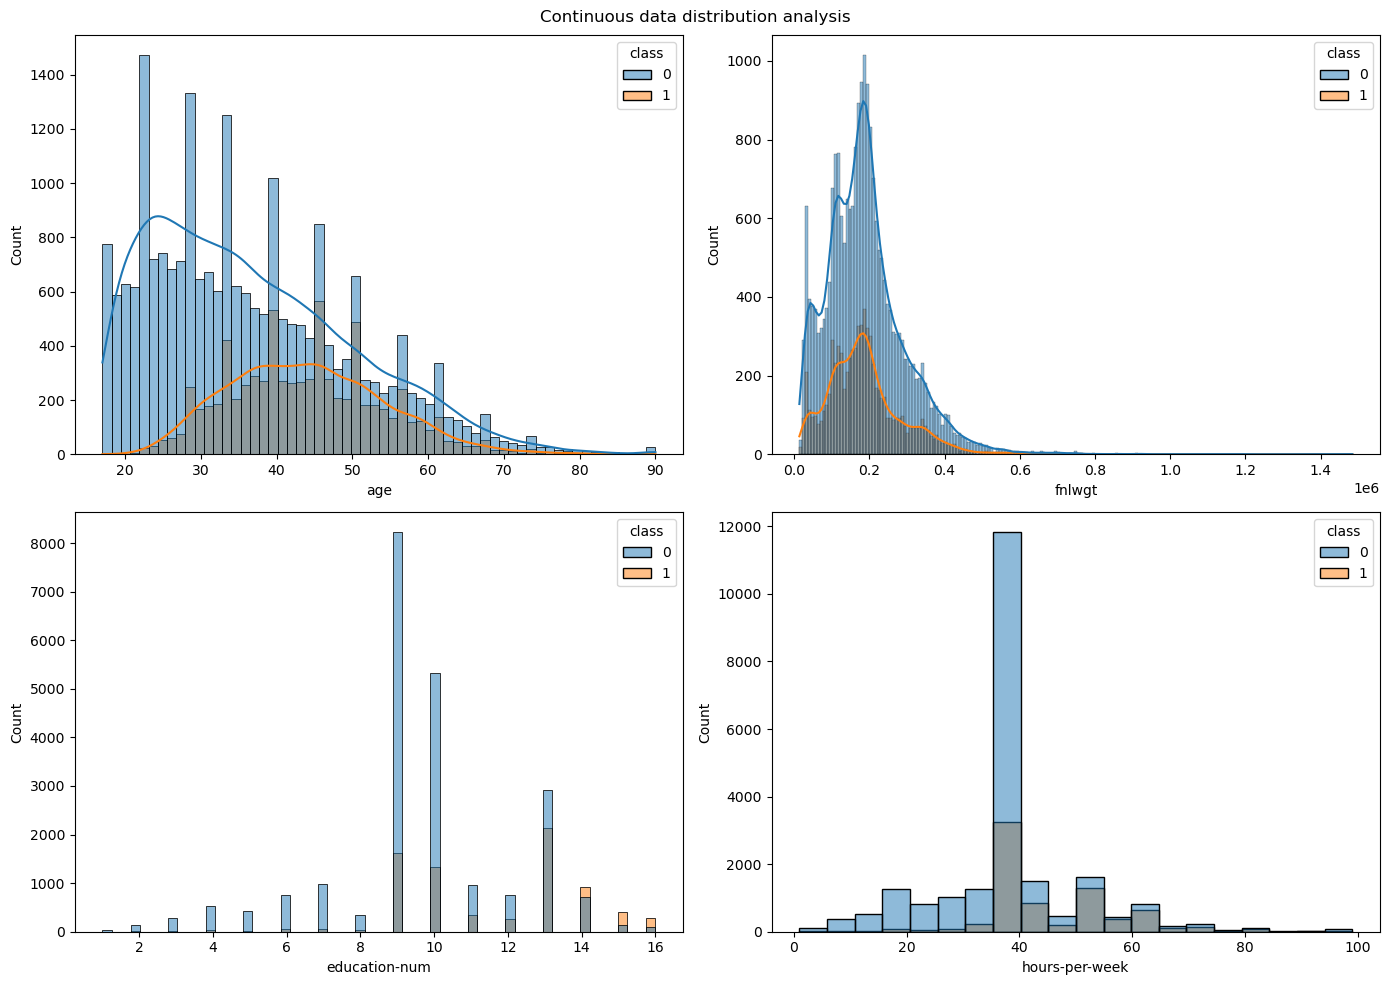

In [27]:
# Continuous varibales analysis
fig, axes  = plt.subplots(2,2, figsize = (14,10))
fig.suptitle('Continuous data distribution analysis')

#age
sns.histplot(ax = axes[0,0], data= train, x = 'age', kde= True, hue = 'class')
#fnlwgt
sns.histplot(ax = axes[0,1], data= train, x = 'fnlwgt', kde= True, hue = 'class')
#education-num
sns.histplot(ax = axes[1,0], data= train, x = 'education-num', hue = 'class')
#hours-per-week
sns.histplot(ax = axes[1,1], data= train, x = 'hours-per-week', bins = 20, hue = 'class')
plt.tight_layout()
plt.show()

Insights:

    1. For 'age': Age distribution of those who earn >50K yearly is more like a normal distribution shape, with mean approximately equals to 45. Age distribution who earn <=50K is left-skewed. It makes sense that young people earn less than the old. 

    2. For 'fnlwgt': Two distribution are almost coincident except the number of people earn <=50K is significant larger than the other group.

    3. The plots of 'education-num' and 'hours-per-week' meet the common sense: people who have better education are more competitive in job markets and thus easier to earn more; People who get paid higher are majorly those who work harder (most of them work more than 40 hours a week). 